# Implementing Gradient Descent

### One Variable Gradeint Decent

In [1]:
def f(x):
    return x**3 + 4* x**2 - 3*x - 2

def df(x):
    return 3*x**2 + 8*x - 3

In [2]:
iteration = 10000
learning_rate = 0.01
x = 4
x_list = [x]

In [3]:
for i in range(iteration):
    dx = -learning_rate * df(x)
    x = x + dx
    x_list.append(x)

In [4]:
print(x)

0.3333333333333336


In [5]:
from matplotlib import pyplot as plt
import numpy as np

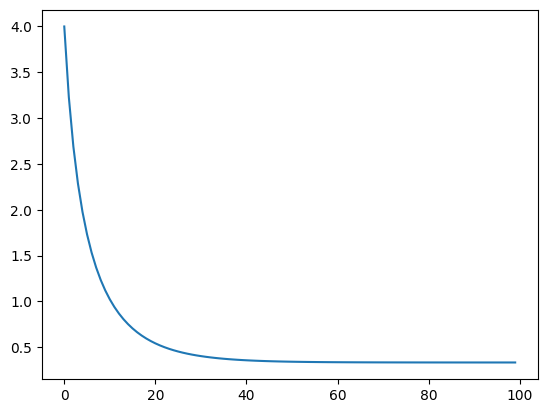

In [6]:
plt.plot(np.arange(100), x_list[:100])
plt.show()

### Two Variable Gradeint Decent

In [7]:
def f(z):
    x,y=z
    return x**2 + y**2 + y - 1/2 * x * y

def df(z):
    x,y=z
    return np.array((2*x-0.5*y, 2*y + 1 -0.5*x))


In [8]:
z = np.array((1,2))
z_list=[z]
for i in range(iteration):
    dz = -learning_rate * df(z)
    z = z + dz
    z_list.append(z)

In [9]:
z

array([-0.13333333, -0.53333333])

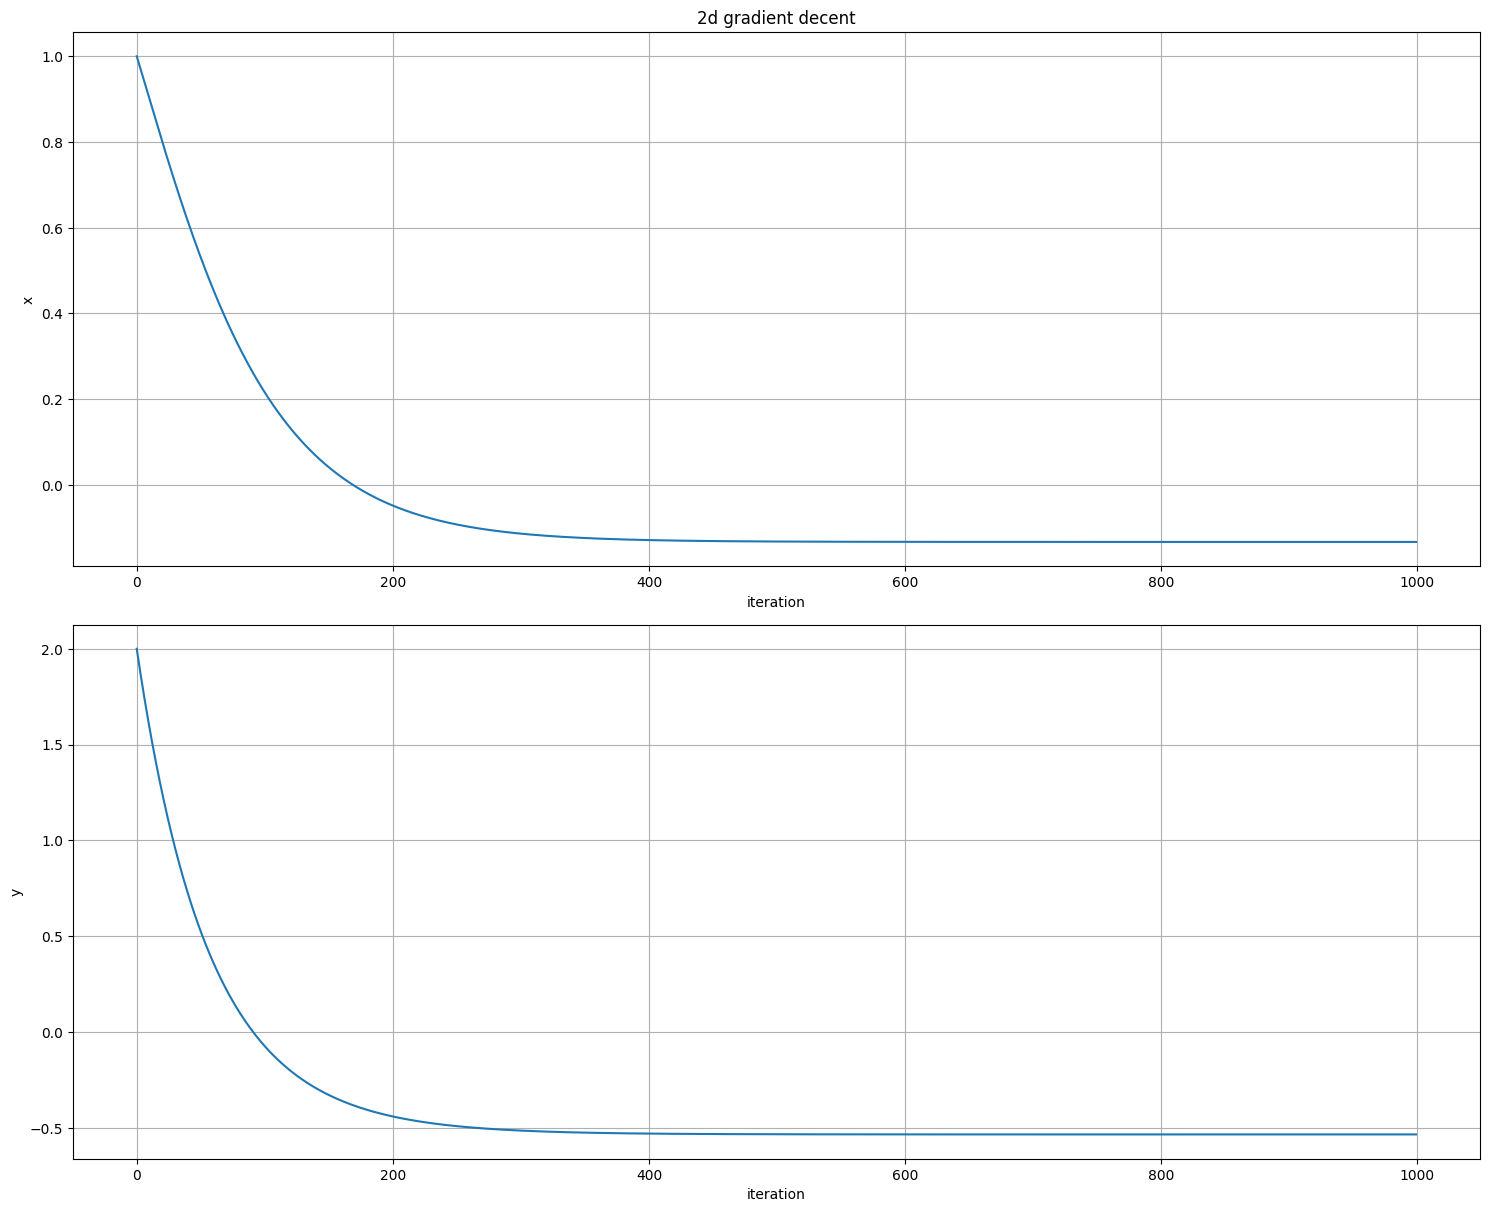

In [10]:
z_list = np.array(z_list)

fig, axs = plt.subplots(2, figsize=(15, 12))

axs[0].plot(np.arange(1000), z_list[:1000, 0])
axs[1].plot(np.arange(1000), z_list[:1000, 1])

axs[0].set_xlabel("iteration")
axs[1].set_xlabel("iteration")
axs[0].set_ylabel("x")
axs[1].set_ylabel("y")

axs[0].grid(True)
axs[1].grid(True)

plt.tight_layout()
axs[0].set_title("2d gradient decent")
plt.show()

## Gradeint Decent On Regression

### فرمول های رگرسیون

$\hat{y}_i = a x_i + b$
$= a X_{i0} + b X_{i1}$

$\hat{y} = X@w$

$LossFunction(w) = \sum_{i=1}^{n}((\hat{y}_i-y_i)^2)$
$=\sum_{i=1}^{n}((X@w-y_i)^2)$

$\frac{\partial \text{LossFunction}}{\partial w_0} = \sum_{i=1}^{n}(2(X_{i0} w_{0} + X_{i1} w_1 - Y_i)  X_{i0})$

$= \sum_{i=1}^{n}(2(X @ w - Y)_i  X_{i0})$

$= 2\sum_{i=1}^{n}(X^T_{0i} (X @ w - Y)_i )$

$= (X^T@(X @ w - Y))_0$

#### $\nabla_w \text{LossFunction}(w)= X^T@ (X @ w - Y)$


In [ ]:
X = np.linspace(-10, 10, 200)
X = np.hstack((X.reshape((200, 1)), np.ones((200, 1))))

Y = np.linspace(-15, 20, 200) + np.random.random((200))
Y = Y.reshape((200, 1))

w = np.array(([0], [0]))

iteration = 1000000
learning_rate = 0.00001

def loss_function(X, Y, w):
    return np.sum((X @ w - Y) ** 2)

def gradient(X, Y, w):
    return 2 *  X.T@ (X @ w - Y)

In [12]:
w_list = [w]
for i in range(iteration):
    dw = -learning_rate * gradient(X, Y, w)
    if np.sum(dw**2) < 1e-10:
        break
    w = w + dw
    w_list.append(w)

In [13]:
w

array([[1.74746676],
       [2.99009032]])

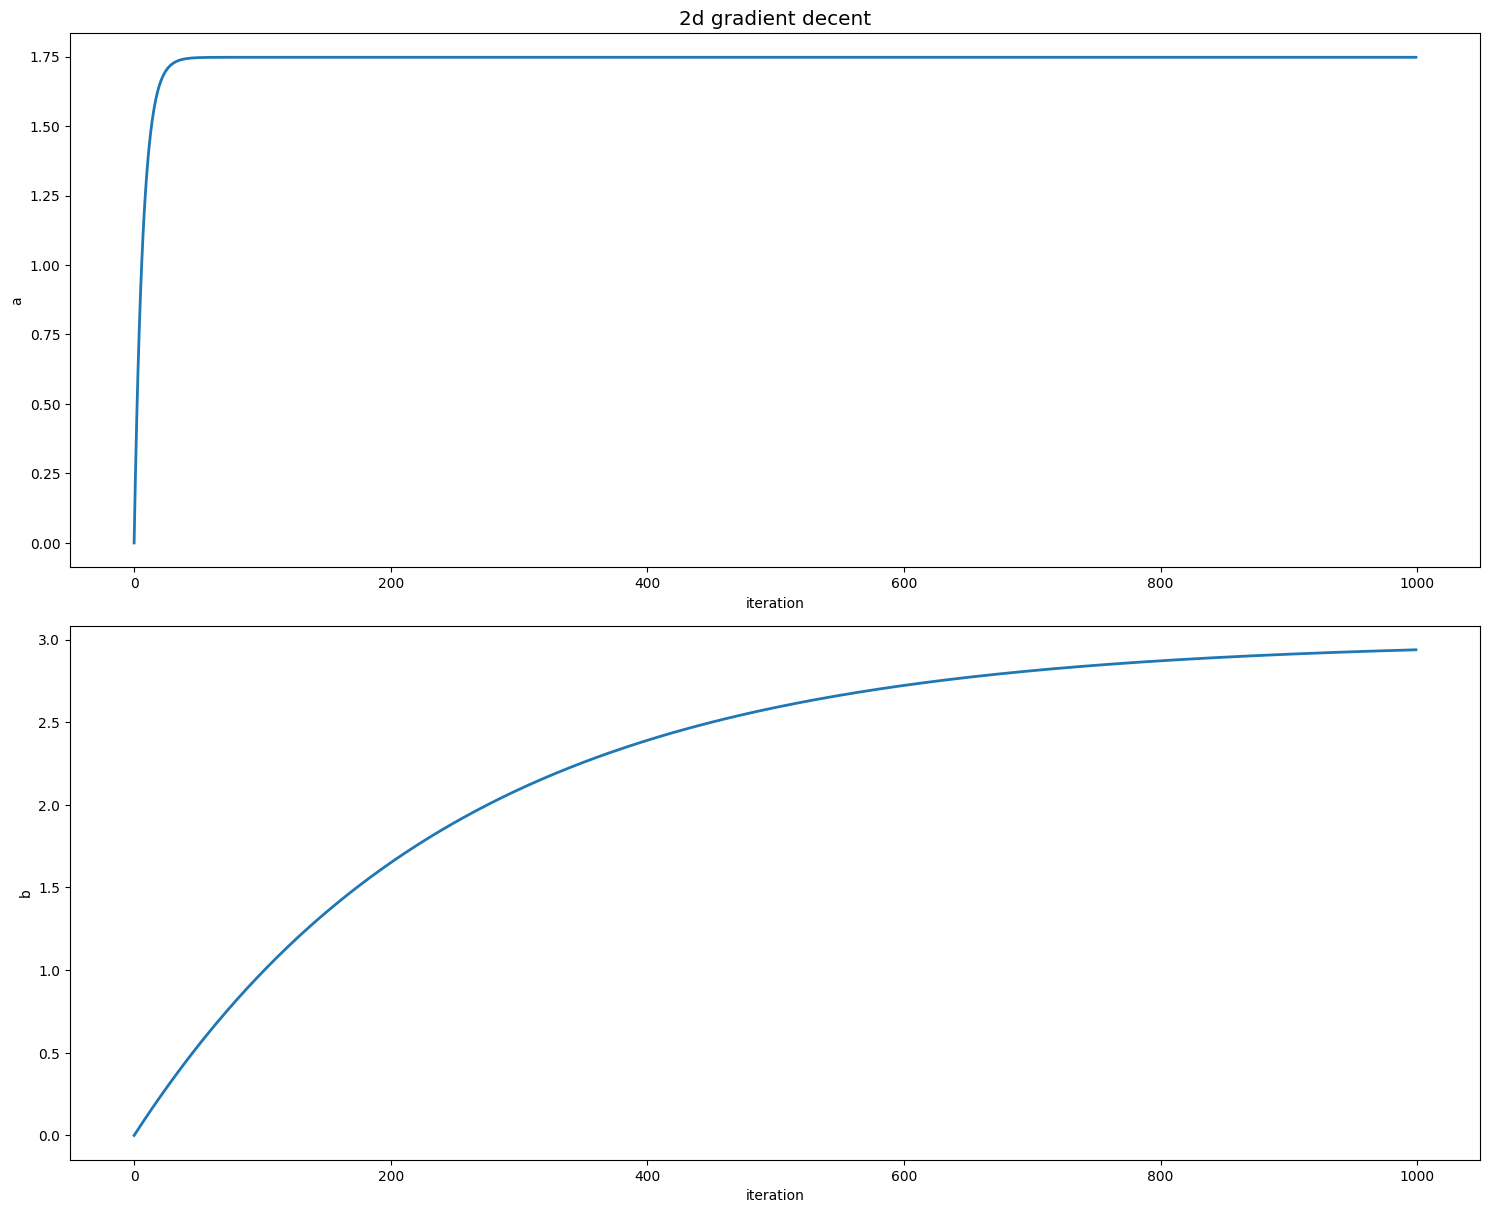

In [14]:
w_list = np.array(w_list)

fig, axs = plt.subplots(2, figsize=(15, 12))
plt.style.use("bmh")
axs[0].plot(np.arange(1000), w_list[:1000, 0])
axs[1].plot(np.arange(1000), w_list[:1000, 1])

axs[0].set_xlabel("iteration")
axs[1].set_xlabel("iteration")
axs[0].set_ylabel("a")  # ax+b
axs[1].set_ylabel("b")

plt.tight_layout()
axs[0].set_title("2d gradient decent")
plt.show()

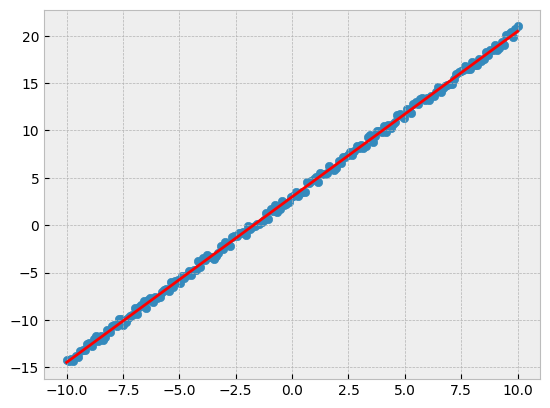

In [15]:
plt.scatter(X[:, 0], Y[:, 0])
y_predicted = X @ w
plt.plot(X[:, 0], y_predicted[:, 0], c="red")
plt.show()